# Black Body Radiation
Authors:  A + B



In [1]:
import numpy as np
import matplotlib.pylab as plt

plt.style.use('seaborn-ticks')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Introduction

Objects with temperatures larger than absolute zero ( 0 K or -273.15 °C) emit energy in terms of electromagnetic radiation. This is the phenomenon of blackbody radiation. Black bodies are idealized objects that perfectly absorb incident radiation of any frequency and angle of incidence. They do not reflect any light, nor do they allow any light to pass through it. That is why black bodies appear black at room temperature. In contrast, a white body would reflect all incident radiation uniformly in all directions (add some references).

In thermal equilibrium, that is at a constant temperature, black bodies emit electromagnetic radiation. The emission spectrum of this black body radiation follows Planck's law and is solely determined by the object's temperature. Shape or composition of a black body has no impact on its emission spectrum. With increasing temperature blackbodies emit more light at all wavelengths. This means, when comparing two blackbodies, the hotter one will always emit more light than the cooler one, regardless of the wavelength.

The emission spectrum of a blackbody is continuous and peaks at a specific wavelength, at which the intensity of the spectrum is maximal. This peak wavelength of the blackbody radiation shifts to shorter wavelengths for hotter objects. 
In terms of visible light, the hotter a blackbody is the bluer the peak wavelength of its emission will be.

A detailed explanation of the blackbody radiation requires knowledge on quantum mechanics as pioneered by Max Planck in 1900. A full quantum mechanical description of the black body phenomenon is beyond the scope of this workshop.

In reality, there exists no ideal blackbody, but many objects like light bulbs, candles, hot metal or lava behave approximately like black bodies.

The black body radiation has particular relevance for cosmology and astrophysics. One of the best measurements of a naturally occurring black body emission spectrum was obtained by ESA's Planck satellite mission, which observed the cosmic microwave background radiation, a relic radiation of the hot big bang from the beginning of our Universe.
Also, the emission spectrum of stars, which are hot luminous spheroids of gaseous plasma, can be approximated by a Planck law.

In the course of this workshop, we want to use the phenomenon of blackbody radiation to make sense of astrophysical observations. 



# Discovering Wien's displacement law

At the beginning of the 20th-century studies of blackbodies revealed new insights into the interaction between matter and radiation and triggered a revolution: The development of quantum mechanics. Modern technical advances, such as LASER technology or modern semiconductors for computers exploit the principles of quantum mechanics which have first been investigated by Planck, Bohr, Heisenberg and others. The discovery and understanding of the blackbody radiation, therefore, played an important role in modern science, technology and our society.   

In the context of astronomy and cosmology, black body radiation can be used to study features of observed celestial objects like stars or galaxies.

Despite its complex quantum mechanical origin, the blackbody emission spectrum exhibits some simple features.

As stated above, the blackbody emission spectrum follows a continuous Planck law, which is solely determined by a single temperature. With increasing temperature the overall radiated energy increases and the peak of the emission spectrum moves to shorter wavelengths. Therefore the hotter a blackbody will be, the bluer the peak wavelength will appear.  

In consequence there exists a unique relation between the temperature and the peak wavelength of a blackbody emission spectrum.

As a first task we seek to discover this universal relationship between temperature and peak wavelength.


## How are temperature and peak wavelength related for blackbody radiation?

Below you will be provided with several Planck spectra for different temperatures. You are supposed to discover the relation between the temperature and the peak wavelength of maximal emission of a blackbody radiator.

There are several paths towards the solution, find your own way. You may use programming techniques, analytical derivations or use paper and pencil to plot and derive this universal law.

You should finish this task within 15 min.


## Some sample blackbody spectra for different temperatures

Here you are given some blackbody emission spectra at different temperatures. You should use these to derive the relation between temperature and peak wavelength.

/Users/jens/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


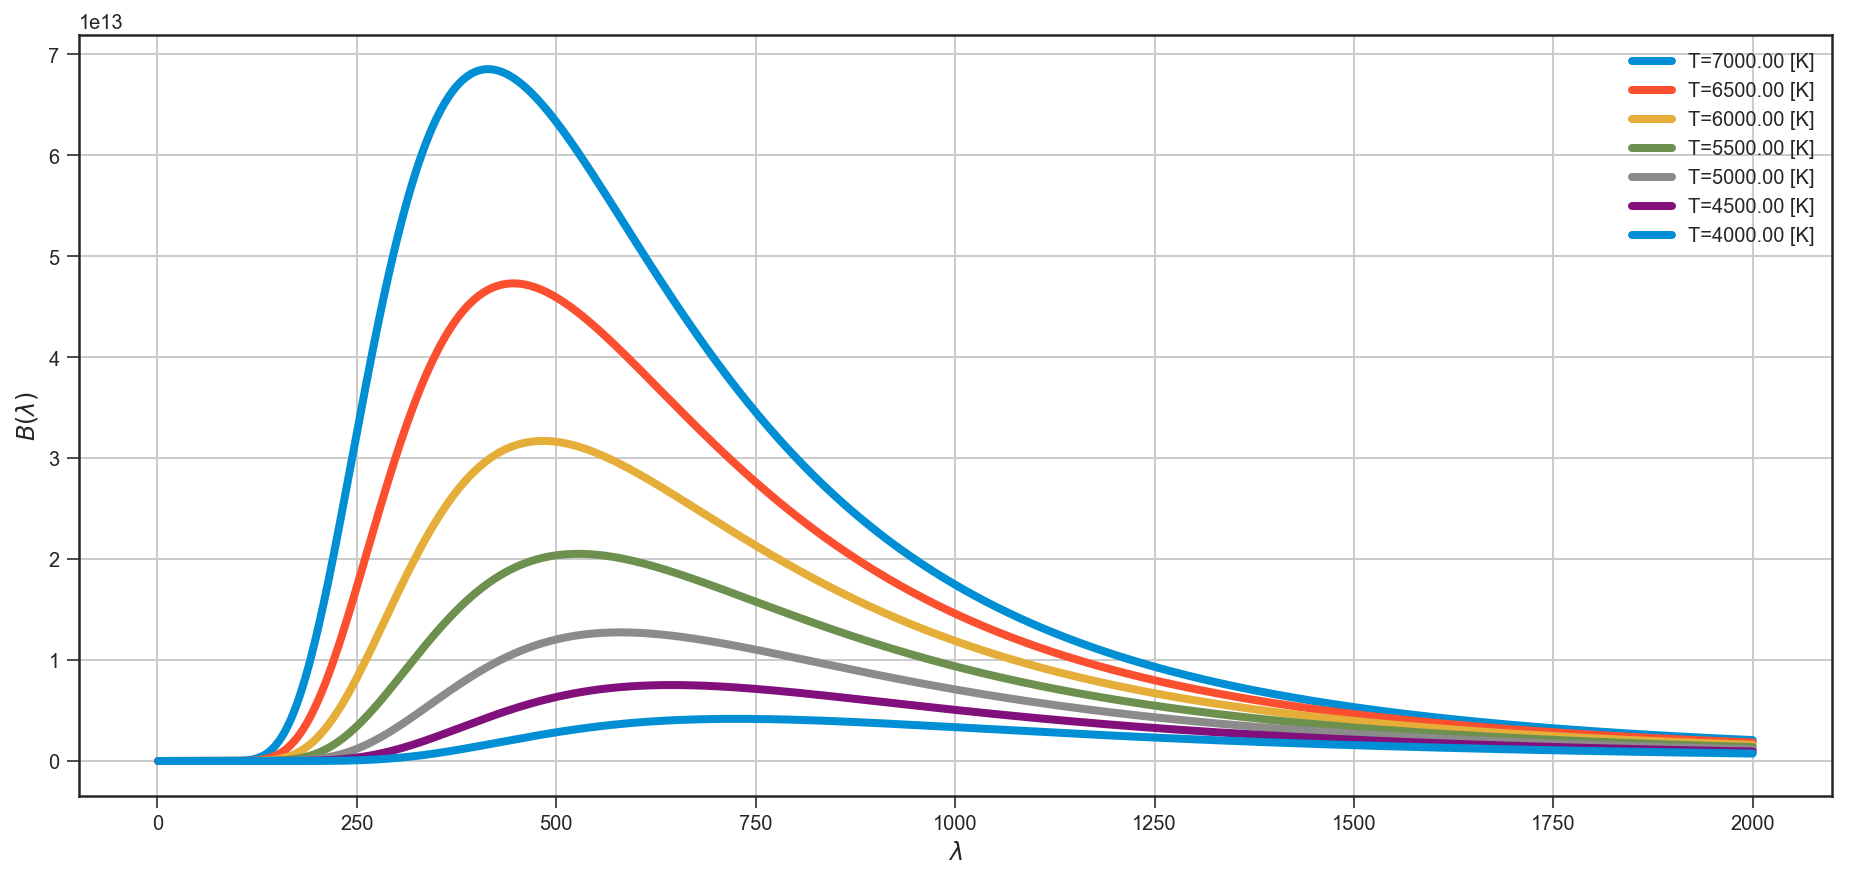

In [42]:
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

# generate x-axis in increments from 1nm to 3 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(1e-9, 2e-6, 1e-10) 

#generate 10 temperatures

intensity=[]
Temp=[]
ntemp=4

Temps=np.array([7000,6500,6000,5500,5000,4500,4000])


plt.figure(figsize=(14, 7))
for T in Temps:
    B = planck(wavelengths, T)
    intensity.append(B)
    Temp.append(T)
    plt.plot(wavelengths*1e9, B,label='T='+'{:06.2f}'.format(T)+' [K]') 
    plt.ylabel(r'$B(\lambda)$')
    plt.xlabel(r'$\lambda$')

'''
for i in range(ntemp):
    T = np.random.uniform(1000,10000,1)[0]
    B = planck(wavelengths, T)
    intensity.append(B)
    Temp.append(T)
    plt.plot(wavelengths*1e9, B,label='T='+'{:06.2f}'.format(T)+' [K]') 
    plt.ylabel(r'$B(\lambda)$')
    plt.xlabel(r'$\lambda$')
'''

# show the plot
plt.grid()
plt.legend()
plt.show()

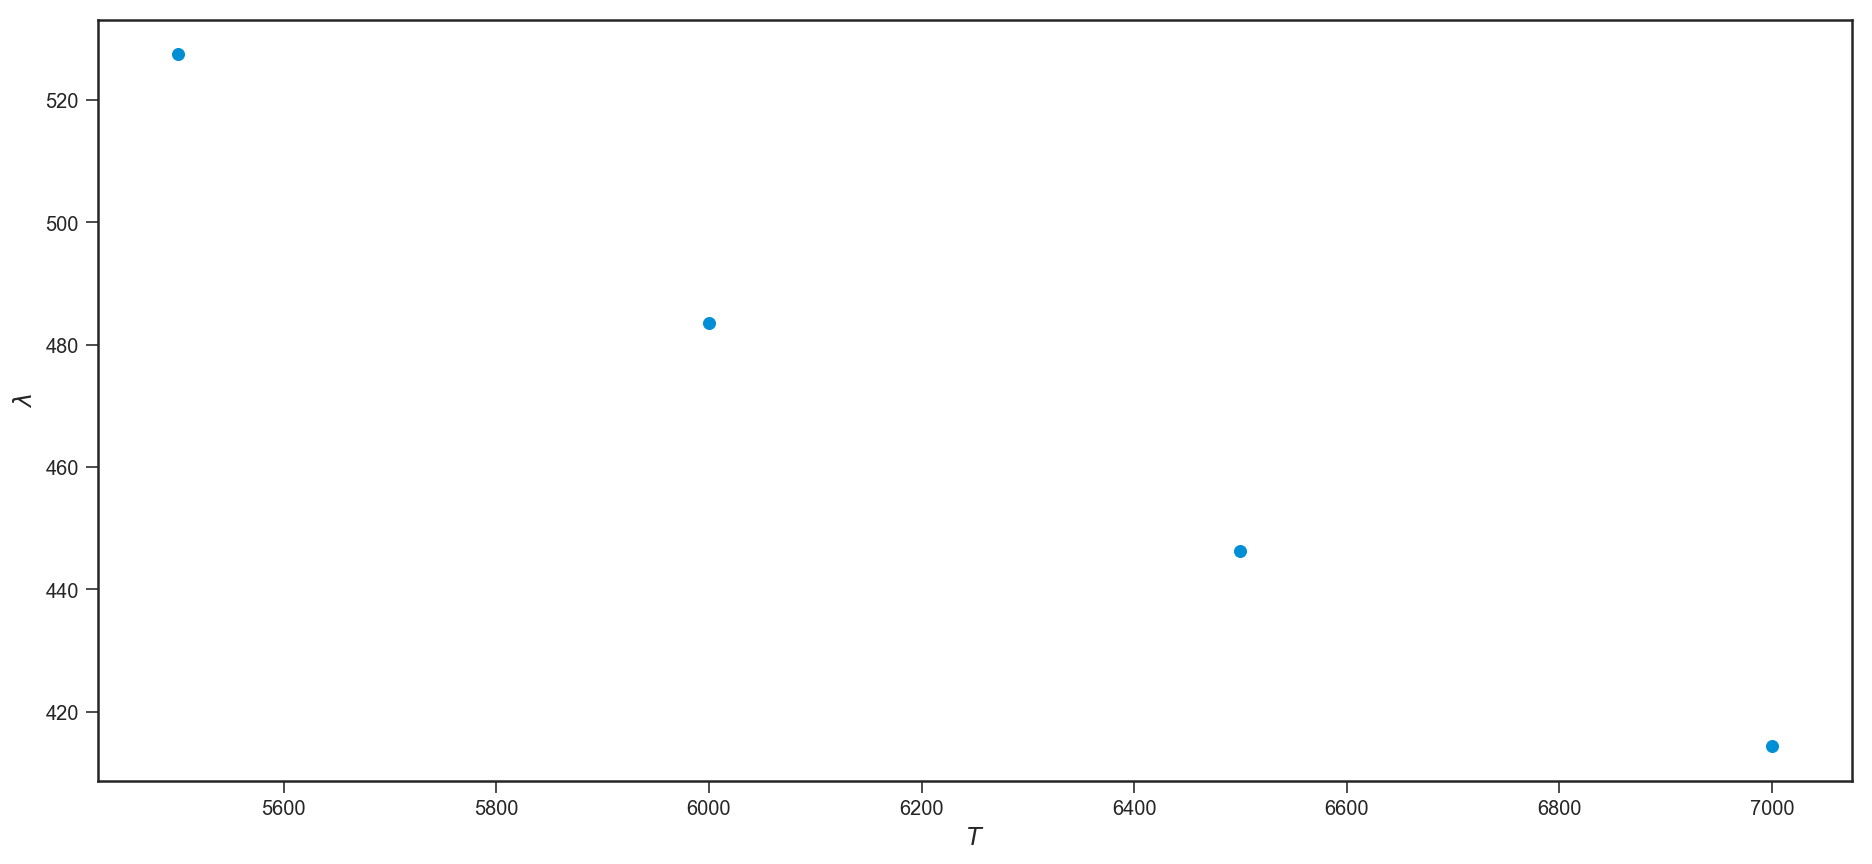

In [43]:
#get maximum
lmax=[]
Tmax=[]
for i in range(ntemp):
    l = np.argmax(intensity[i])
    lmax.append(wavelengths[l]*1e9)
    Tmax.append(Temp[i])


plt.figure(figsize=(14, 7))    
plt.scatter(np.array(Tmax),np.array(lmax))
plt.xlabel(r'$T$')
plt.ylabel(r'$\lambda$')
plt.show()

# Measuring stellar temperatures


The spectrum of emitted electromagnetic radiation of stars follows approximately the Planck law superimposed by additional spectral absorption features of atoms in the cooler outer stellar atmospheres. Both features, the continuum emission as well as spectral absorption lines are dependent on temperature. Consequently, the light we receive from distant stars provides us with significant information on their temperatures.

However, temperatures of stars cannot be measured directly and thus we will extract such information from the continuum black body radiation. In particular, we may use Wien's displacement law, as derived above, to simply relate the peak wavelength of the observed spectrum to the temperature of a star.


In the following you will measure the temperature of several stars in the Milky Way.

## Measure the Temperature of the sun


<img src="https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2000/11/soho_image_of_the_sun/9227898-5-eng-GB/SOHO_image_of_the_Sun_node_full_image_2.gif" width="40%">


<div style="text-align: justify"> 
<p>
The International Space Station (ISS) has tracked our sun to measure its energy for almost a decade now. 
In particular the Solspec instrument, part of the solar package aboard the ISS has measured the energy at different wavelength in the optical spectrum to high accuracy. Launched together with the European Columbus space laboratory in 2008 it has tracked the Sun until it was shut down this year. 
</p>
<p>
The Solspec instrument provides us with a very accurate reference measurement of the spectrum of our sun.
</p>
</br>
In the following you should use this spectrum and the results of the Wien's displacement law to estimate the temperature of our sun.  

</div>

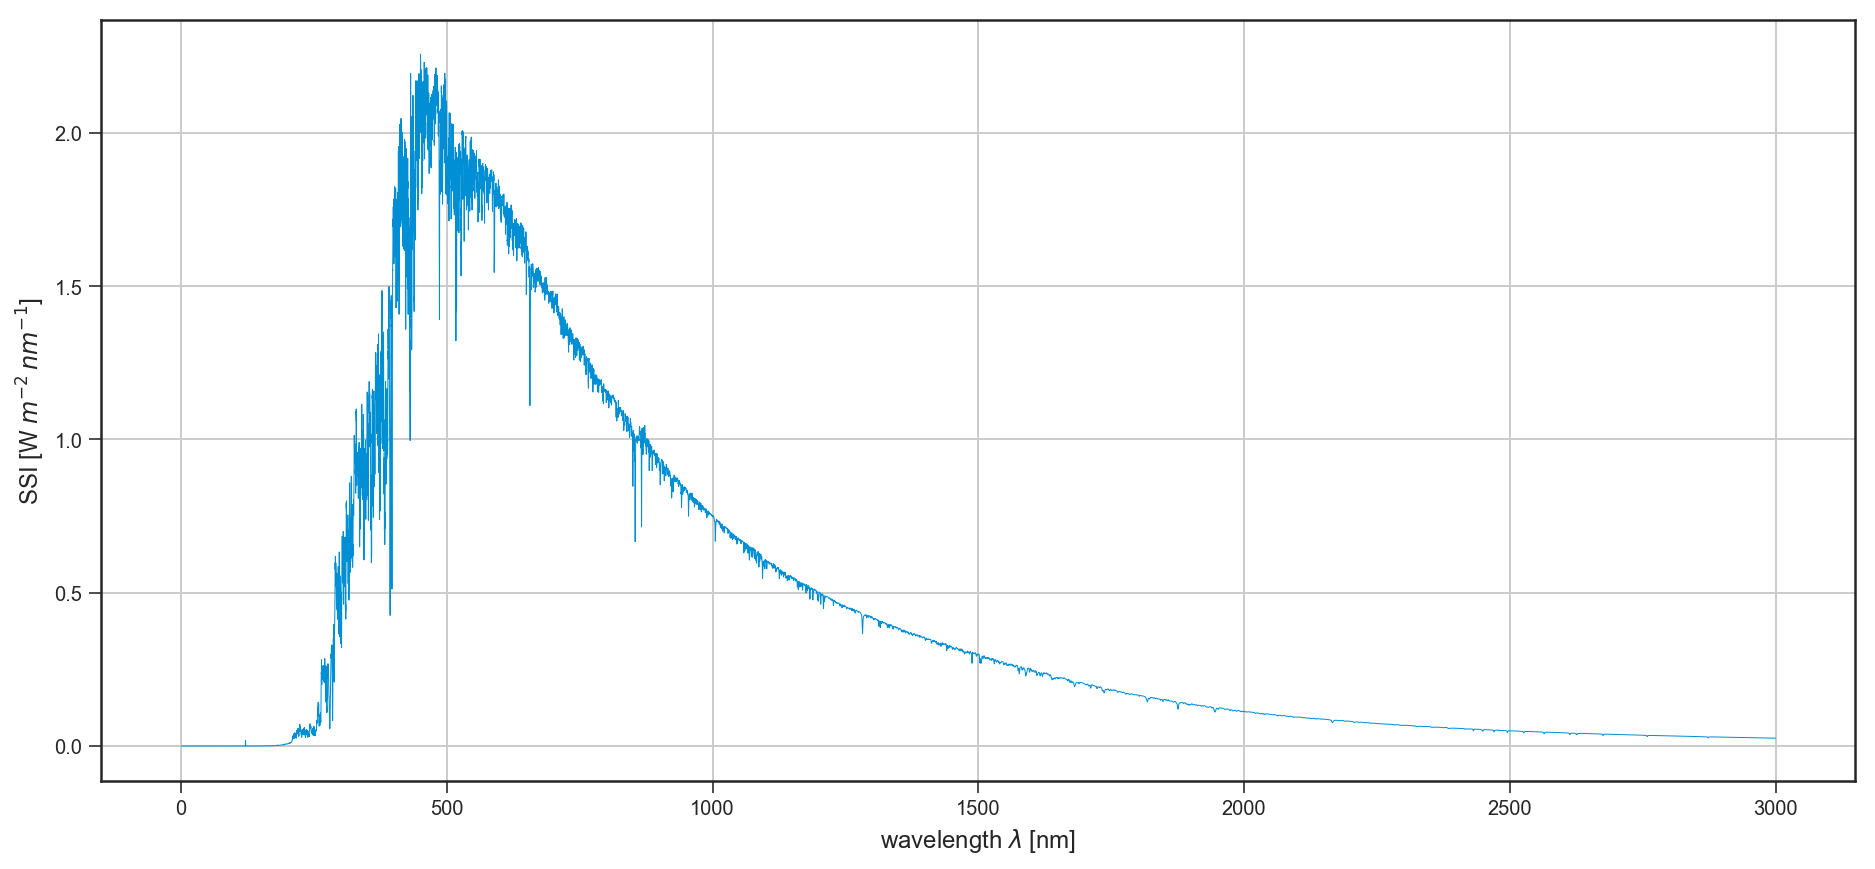

In [44]:
x,y=np.loadtxt('./data/solar_reference_spectrum_2018.dat', usecols=[0,1], unpack=True)

plt.figure(figsize=(14, 7))
plt.plot(x,y,lw=0.5)
plt.xlabel(r'wavelength $\lambda$ [nm]')
plt.ylabel(r'SSI [W $m^{-2}\, nm^{-1}$]')
plt.grid()
plt.show()

## Measure the Temperature of Sirius

<img src="https://cdn.spacetelescope.org/archives/images/screen/heic0516e.jpg" width="40%">


<div style="text-align: justify"> 
<p>
Sirius (also called α CMa according to the Bayer designation) is a star in the constellation Canis Major to the left and below Orion. Its name comes from ancient Greek meaning “glowing” or “scorcher.” Sirius is the brightest star in the night sky. This is not surprising since, with a distance of only nine lightyears from Earth, Sirius is one the closest stars to us in the Universe. While the naked eye perceives Sirius as a single star, investigation with telescopes reveal that Sirius is a binary star system consisting of a bright white star, named Sirius A, accompanied by a faint white dwarf, called Sirius B. Sirius A is about two times more massive and 25 times more luminous than our Sun.
</p>
<p>
The Solspec instrument provides us with a very accurate reference measurement of the spectrum of our sun.
</p>
</br>
In the following you should use this spectrum and the results of the Wien's displacement law to estimate the temperature of our sun.  

</div>

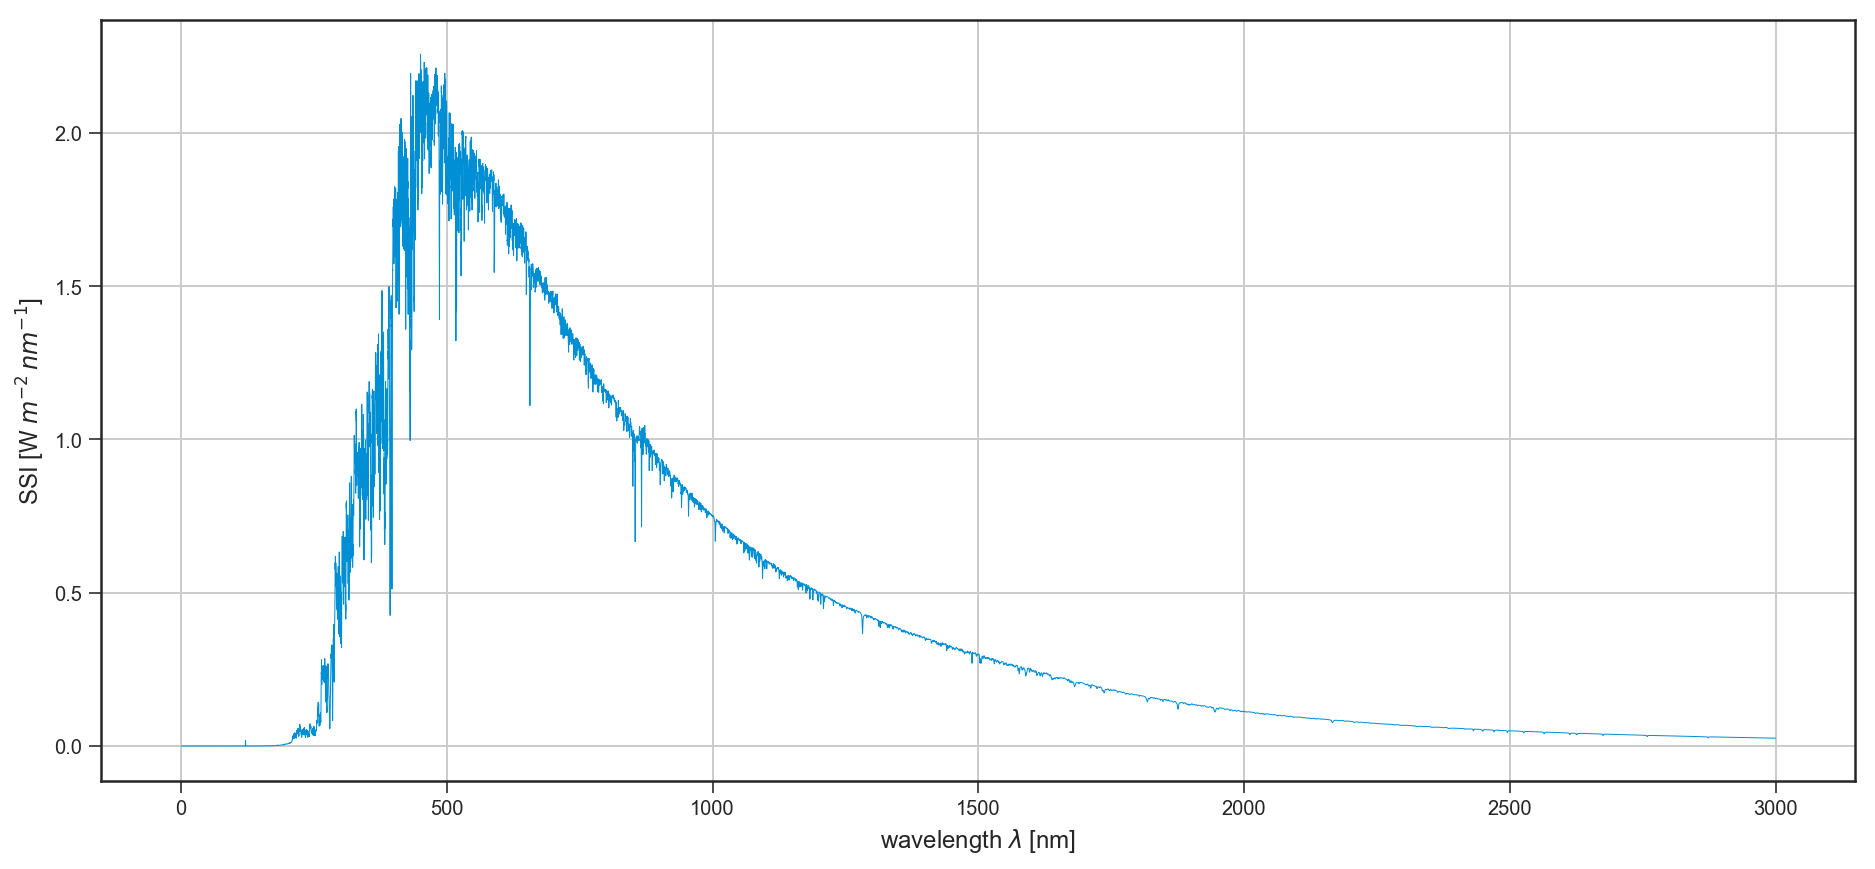

In [45]:
x,y=np.loadtxt('./data/solar_reference_spectrum_2018.dat', usecols=[0,1], unpack=True)

plt.figure(figsize=(14, 7))
plt.plot(x,y,lw=0.5)
plt.xlabel(r'wavelength $\lambda$ [nm]')
plt.ylabel(r'SSI [W $m^{-2}\, nm^{-1}$]')
plt.grid()
plt.show()

In [10]:
T_sun = Tmax[10]*lmax[10]/500.00
print('T_sun =',T_sun)

T_sun = 5802.248731118041


# References

In [15]:
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10']


In [16]:
from astroquery.simbad import Simbad
from astroquery.sdss import SDSS
from astroquery.heasarc import Heasarc
from astroquery.gaia import Gaia
result_table = Simbad.query_objectids("sirius b")

#result_table = Heasarc.query_object("sirius b", mission='rospublic')

#result_table = Gaia.query_object("sirius b")




#result_table = SDSS.query_specobj("sirius b")

print(result_table)

          ID         
---------------------
        NAME Sirius C
       NAME Sirius BC
        NAME Sirius B
2RXF J064508.6-164240
          * alf CMa B
             2E  1730
   2RE J064509-164243
        2RE J0645-164
          8pc 379.21B
          ADS  5423 B
                  ...
     [BM83] X0642-166
     1E 064255-1639.3
        1ES 0642-16.6
       2E 0642.9-1638
     2EUVE J0645-16.7
      EUVE J0645-16.7
    WDS J06451-1643BC
        ** AGC    1BC
1RXS J064509.3-164241
     1E 064255-1639.4
      RX J0645.1-1642
Length = 39 rows


In [17]:
qso = SDSS.get_spectral_template(kind='qso')
Astar = SDSS.get_spectral_template(kind='star_A')
Fstar = SDSS.get_spectral_template(kind='star_F')

In [21]:
print(SDSS.AVAILABLE_TEMPLATES)

{'star_O': 0, 'star_OB': 1, 'star_B': 2, 'star_A': [3, 4], 'star_FA': 5, 'star_F': [6, 7], 'star_G': [8, 9], 'star_K': 10, 'star_M1': 11, 'star_M3': 12, 'star_M5': 13, 'star_M8': 14, 'star_L1': 15, 'star_wd': [16, 20, 21], 'star_carbon': [17, 18, 19], 'star_Ksubdwarf': 22, 'galaxy_early': 23, 'galaxy': [24, 25, 26], 'galaxy_late': 27, 'galaxy_lrg': 28, 'qso': 29, 'qso_bal': [30, 31], 'qso_bright': 32}


In [22]:
whitedwarf = SDSS.get_spectral_template(kind='star_wd')

In [28]:
list(whitedwarf)


[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1515ec16a0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1515f54518>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1515f5df28>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1515f6d400>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1515f6dbe0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1515f73978>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1515d145c0>],
 [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1515ede4e0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1515de6128>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1515de1a20>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1515f7af60>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1515f6d4a8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1515f807b8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1515f84160>],
 [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1515f4e470>, <astropy.io.fits.hdu.table.BinTable